# Implemetação de uma rede neural perceptron

## 1) Importar bibliotecas necessárias 

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 2) Gerar Dataset

Vetor de pesos [0. 0. 0.]


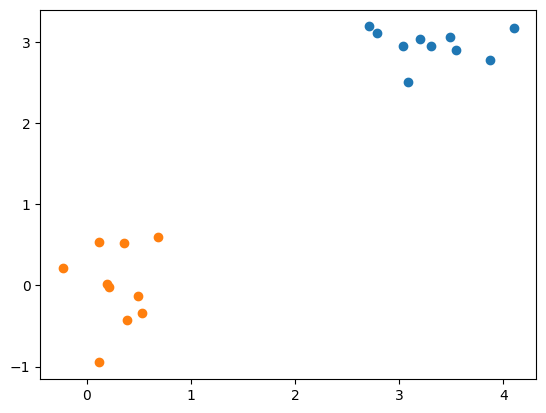

    Atributo 1  Atributo 2  Label
0        4.098       3.169      1
1        2.709       3.190      1
2        3.203       3.041      1
3        3.482       3.065      1
4        3.307       2.954      1
5        3.872       2.782      1
6        3.084       2.504      1
7        3.031       2.944      1
8        2.787       3.104      1
9        3.542       2.902      1
10       0.212      -0.018     -1
11       0.353       0.518     -1
12      -0.231       0.218     -1
13       0.114      -0.950     -1
14       0.385      -0.427     -1
15       0.487      -0.136     -1
16       0.529      -0.337     -1
17       0.684       0.595     -1
18       0.114       0.533     -1
19       0.196       0.021     -1


In [69]:
# Matriz de pesos - Primeiro elem. bias
w = np.zeros(3)
print("Vetor de pesos", w)

# Matriz de atributos
# Classe 1
x1_class1 = np.around(np.random.normal(3, 0.5, 10), 3)
x2_class1 = np.around(np.random.normal(3, 0.5, 10), 3)

# Classe 2
x1_class2 = np.around(np.random.normal(0, 0.5, 10), 3)
x2_class2 = np.around(np.random.normal(0, 0.5, 10), 3)

plt.scatter(x1_class1, x2_class1)
plt.scatter(x1_class2, x2_class2)
plt.show()


# Inserir dados em um dataframe 
x1 = np.append(x1_class1, x1_class2)
x2 = np.append(x2_class1, x2_class2)

df = pd.DataFrame(x1, columns=['Atributo 1'])
df.insert(1,"Atributo 2", x2)
df.insert(2,"Label", [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])



print(df)



## 3) Ativação e algoritimo de aprendizado do perceptron

Para o presente caso:

$$
w_1 . x_1 + w_2 . x_2 + b = 0
$$

Resposta desejada

    . Classe 1 ->  1
    . Classe 2 ->  -1

### 3.1) Classe Perceptron

In [86]:
class Perceptron:
    def __init__(self, learnRate, epochs):
        self.learnRate = learnRate
        self.epochs = epochs
        self.w = np.zeros(3)

    # Função de previsão da rede
    def predict(self, x1, x2):

        y = self.w[0] * x1 + self.w[1] * x2 + self.w[2]
        if y >= 0:
            return 1
    
        return -1
    
    # Função de aprendizado
    def learn(self, label, output, x1, x2):
        self.w[0] += self.learnRate * (label - output) * x1
        self.w[1] += self.learnRate * (label - output) * x2
        self.w[2] += self.learnRate * (label - output)

    # Função de treinamento
    def fit(self, X, labels):
        for _ in range(self.epochs):
            for x, label in zip(X, labels):
                y = self.predict(x[0], x[1])
                self.learn(label, y, x[0], x[1])

            # Imprime a fronteira de decisão em cada época
            num = np.linspace(-2,8,50)
            f = - (self.w[0] * num + self.w[2]) / self.w[1]
            plt.plot(num, f)

        plt.scatter(X[:, 0], X[:, 1])
        plt.show()
        
    # Função para imprimir fronteira de decisão 
    def printFrontier(self, X):
        for x in X:
            plt.scatter(x[0], x[1])

        x = np.linspace(-2,4,10)

        f = - (self.w[0] * x + self.w[2]) / self.w[1]
        plt.plot(x, f)

        plt.show()

### 3.4) Treinamento:

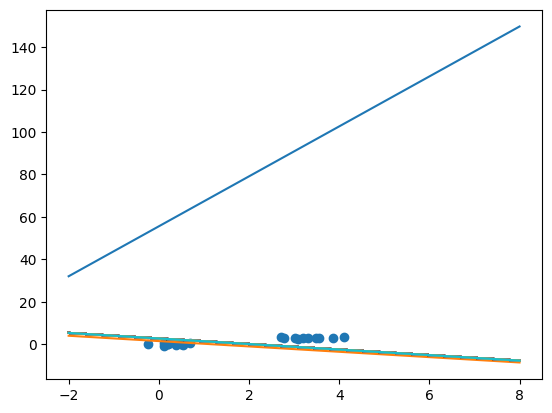

In [87]:
# Matriz com as features 
X = df[df.columns.difference(['Label'])].values

# Vetor com as classes 
labels = df['Label'].values

perceptron = Perceptron(0.1, 100)
perceptron.fit(X, labels)

    
    



## 4) Análise da fronteira de decisão 

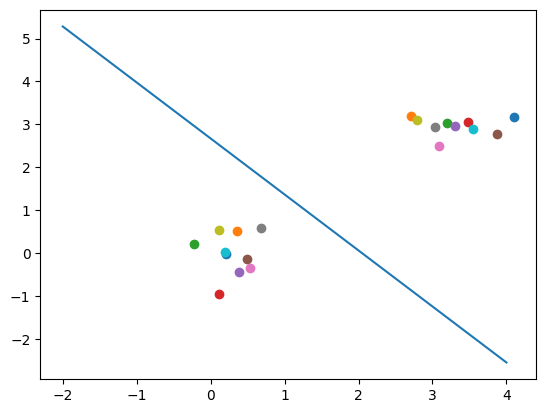

In [88]:
perceptron.printFrontier(X)

### 5) Calcular matriz de confusão